<a href="https://colab.research.google.com/github/jej24/FILTROS/blob/master/filtros.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [78]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [79]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os

path='/content/drive/My Drive/PDI/INTERPOLACION/'
os.chdir(path)
!pwd
%matplotlib inline

/content/drive/My Drive/PDI/INTERPOLACION


In [0]:
def display22(a,b,title1="Orginial", title2="Edited"):
    plt.figure(figsize=(10,10))
    plt.subplot(121), plt.imshow(a, cmap='gray'),plt.title(title1)
    plt.xticks([]),plt.yticks([])
    plt.subplot(122), plt.imshow(b, cmap='gray'), plt.title(title2)
    plt.xticks([]),plt.yticks([])
    plt.show()
    

In [0]:
def readRGB(imgPath):
   img = cv2.imread(imgPath)
   img =cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
   return img

**1ER FILTRO**

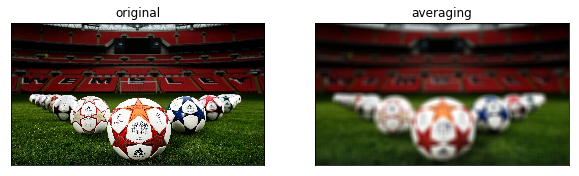

In [25]:
img = readRGB('balones.jpg')
color = ('r','g','b')


kernel = np.ones((11,11), np.float32)/121
dst = cv2.filter2D(img,-1, kernel)

display22(img, dst, "original", "averaging")

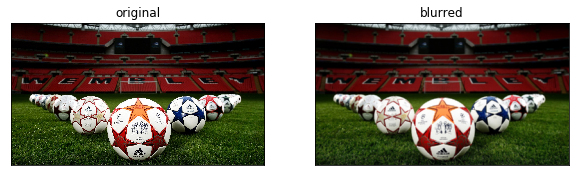

In [27]:
img = readRGB('balones.jpg')
color = ('r','g','b')

blur = cv2.blur(img, (11,11))
display22(img, blur, "original", "blurred")

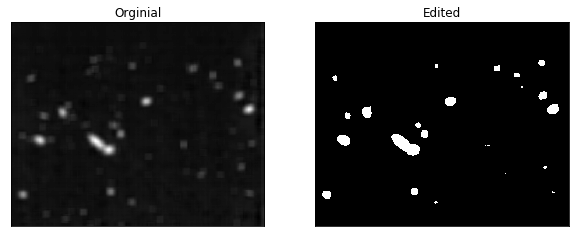

In [94]:
img = cv2.imread('manchas.png', cv2.IMREAD_GRAYSCALE)

dst = cv2.blur(img,(13,13))
 
row, column = dst.shape
img1 = np.zeros((row, column), dtype ='uint8')
   
min_range = 55
max_range = 255
   
   
for i in range(row):
   for j in range(column):
       if dst[i, j]>min_range:
           img1[i,j] = 255
       else:
           img1[i,j] = 0
               
display22(dst,img1)


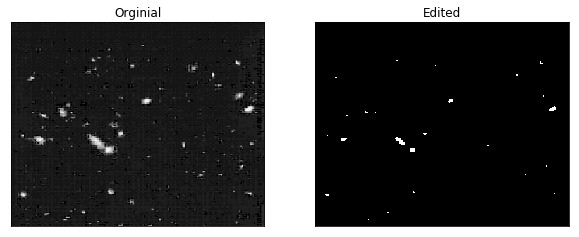

In [73]:
def binarizacion(img,minr=10, maxr=60):
  
    img = cv2.imread(img, 0)
    # Find width and height of image
    row, column = img.shape
    
    #create an zeros array to store the sliced image
    
    img1 = np.zeros((row,column), dtype = 'uint8')
     
    #Specify the min and max range
    
    min_range = minr
    max_range = maxr
    
    #loop over the input image and if pixel value lies in 
    for i in range(row):
        for j in range(column):
            if img[i,j]>min_range and img[i,j]<max_range:
                img1[i,j] = 255
            else:
                img1[i,j] = 0
    
    #display the image
    
    display22(img, img1)
    
binarizacion('manchas.png',200,255)    